# Getting Started with Equities: Researching the Momentum Factor

*This example notebook is part of QuantRocket's [Getting Started with Equities](https://www.quantrocket.com/tutorials/equities/) tutorial series.*

*The notebook assumes that you've already created a historical price database called "demo-stocks-1d". Please refer to the tutorial series if you haven't completed this step.*

Momentum investing says that excess returns can be generated by buying recent winners and selling recent losers. In this notebook we'll use Alphalens, an open-source research tool created by Quantopian, to test the momentum factor on a universe of demo stocks. This will help us determine whether we have a profitable idea before turning to a full-scale backtest.  

## A very brief intro to Jupyter notebooks for total beginners
*Skip this section if you're familiar with Jupyter notebooks.*

Jupyter notebooks are interactive documents that let you write and execute code and run visualizations alongside narrative text. They are great tools for quantitative research.

Quick demo:

* place your mouse in this cell to highlight it
* On the top menu, click the "+" icon to create a new cell below this one.
* In the new cell, type:
    
    > `print("1 + 1 is the same as", 1+1)`


* Press "SHIFT+ENTER" to execute the cell (or select Cell > Run Cells from the top menu).
* place your mouse in the cell just executed to highlight, then click the "+" icon to create another new cell
* Change the dropdown selector in the top menu from "Code" to "Markdown"
* In the new cell, type:

    > `Jupyter notebooks are **fantastic**`


* Press "SHIFT+ENTER" (Cell > Run Cells) to execute the cell and render the Markdown.

Now that you know the basics of Jupyter notebooks, work through the remainder of this notebook by running the code cells to execute them in real-time using your data (optionally editing the code before you execute it). 

### End of very brief intro

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%pylab inline --no-import-all
import alphalens
import pandas as pd
from quantrocket.history import download_history_file
import io

Populating the interactive namespace from numpy and matplotlib


First, download a CSV of your historical data. We use `io.StringIO` to write the data to an in-memory file.

In [3]:
f = io.StringIO()
download_history_file("demo-stocks-1d", f, start_date="2010-01-01", fields=["Close"])

Next, load the historical data into pandas.

In [4]:
prices = pd.read_csv(f, parse_dates=["Date"])
# This one-liner uses `pivot` and `T` (transpose) to reshape the data
# such that the columns are securities (represented by ConIds) and the
# index is a two-level index of (Field, Date). 
prices = prices.pivot(index="ConId", columns="Date").T
prices.head()

ConId             265598     267892     274105     3691937    15124833   \
      Date                                                                
Close 2010-01-04     30.575      53.59     11.525     133.90      7.640   
      2010-01-05     30.625      52.24     11.795     134.69      7.360   
      2010-01-06     30.140      52.45     11.710     132.25      7.615   
      2010-01-07     30.085      51.73     11.675     130.00      7.485   
      2010-01-08     30.285      51.50     11.640     133.52      7.615   

ConId             39927629   41498671   208813719  
      Date                                         
Close 2010-01-04      31.15      30.99    313.690  
      2010-01-05      32.02      32.71    312.305  
      2010-01-06      31.87      32.35    304.435  
      2010-01-07      31.76      31.39    297.345  
      2010-01-08      32.17      32.68    301.310

Next, we use closing prices to calculate our momentum factor, the predictive factor we'll pass to Alphalens. We calculate momentum using a twelve-month window but excluding the most recent month, as commonly recommended by academic papers. 

In [5]:
closes = prices.loc["Close"]

MOMENTUM_WINDOW = 252 # 12 months = 252 trading days
RANKING_PERIOD_GAP = 22 # 1 month = 22 trading days
returns = closes.shift(RANKING_PERIOD_GAP)/closes.shift(MOMENTUM_WINDOW) - 1

# Stack the returns as Alphalens expects
returns = returns.stack()
returns.head()

Date        ConId   
2011-01-03  265598      0.478332
            267892      0.091062
            274105      0.375271
            3691937     0.318521
            15124833    2.742147
dtype: float64

Now we're ready to pass our data to Alphalens and check out the returns tear sheet. In addition to passing Alphalens a predictive factor, we also need to provide pricing data so that Alphalens can tell us whether the factor predicted subsequent prices.

Dropped 0.6% entries from factor data (0.6% after in forward returns computation and 0.0% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.
Returns Analysis


,1,5,10
Ann. alpha,0.336,0.319,0.302
beta,-0.357,-0.417,-0.371
Mean Period Wise Return Top Quantile (bps),4.969,3.987,4.183
Mean Period Wise Return Bottom Quantile (bps),-4.969,-3.993,-4.198
Mean Period Wise Spread (bps),9.938,7.976,8.381


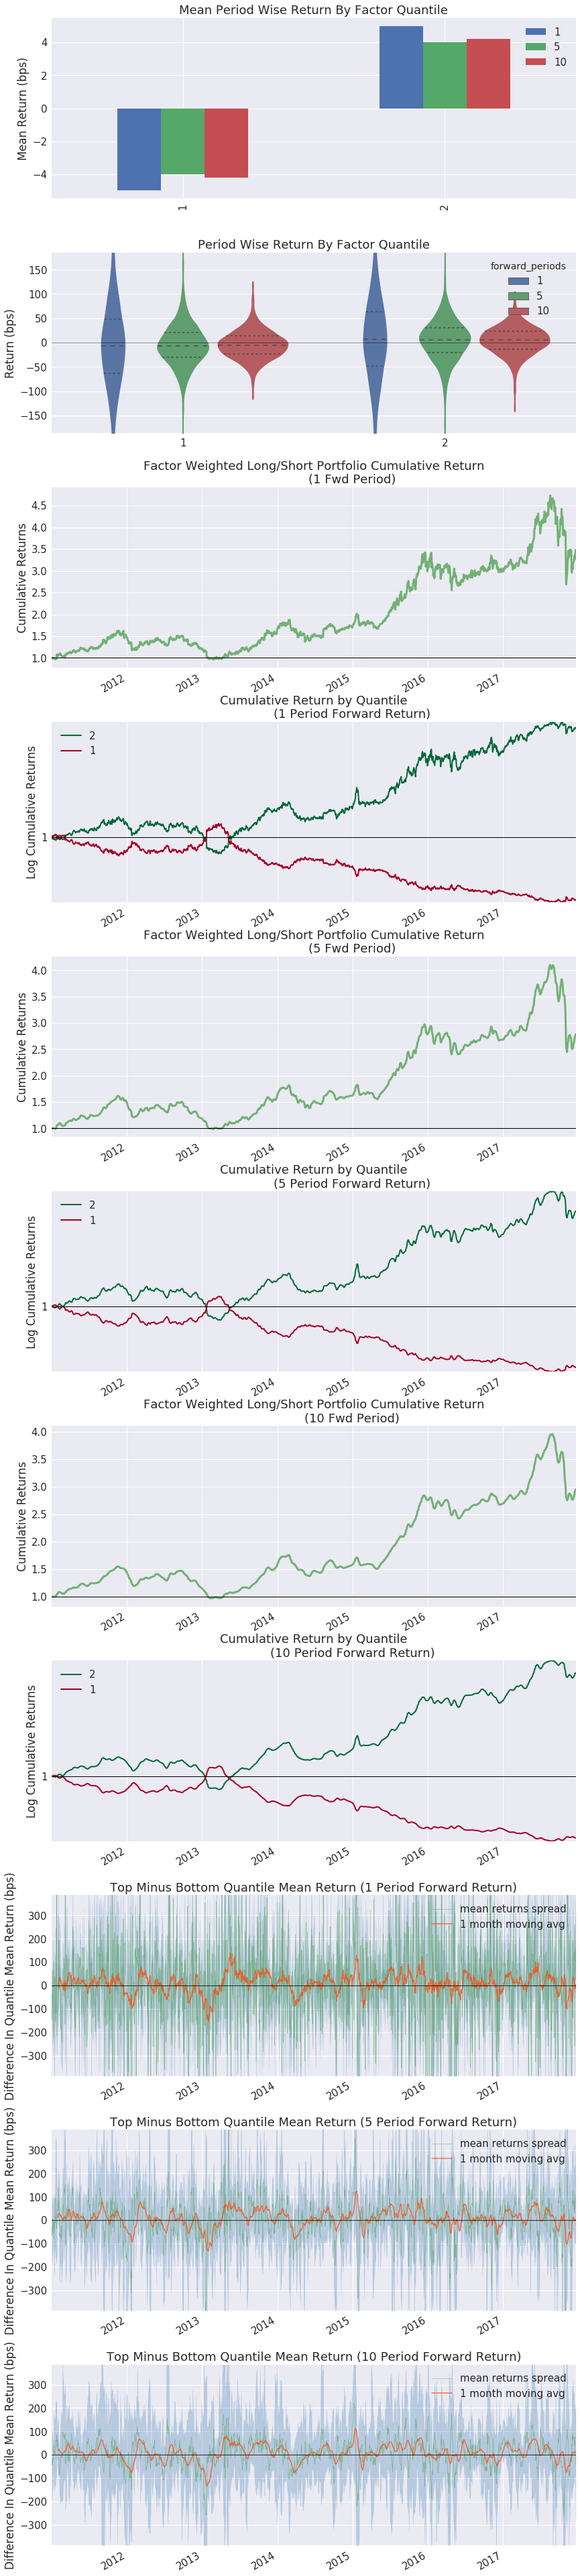

In [6]:
# For a very small demo universe, you might only want 2 quantiles 
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(returns, closes, quantiles=2)
alphalens.tears.create_returns_tear_sheet(factor_data)

How did the momentum factor perform for your universe? For a predictive factor, the higher quantiles should perform better than the lower quantiles, and the cumulative return charts should trend upward. Never fear if the momentum factor didn't work for your universe; it's your job to find what factors *do* work, and on what universes.  

(Alphalens can provide much more information about your factor than what's shown on the returns tear sheet. Check out the Alphalens docs or the other example notebooks to go deeper with Alphalens.)

## Next steps

Now that you found a factor that looks promising (or that you can pretend looks promising), you can continue with the [Getting Started with Equities](https://www.quantrocket.com/tutorials/equities/) tutorials and learn how to translate your research into backtests.